In [51]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import matplotlib.pyplot as plt
import geopandas as gpd

### Extract the crowdfunding.xlsx Data

In [52]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [53]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [54]:
# Get the crowdfunding_info_df columns.
crowdfunding_info_df.columns

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

In [55]:
# Assign the category and subcategory values to category and subcategory columns.
# Split the 'category & sub-category' column
crowdfunding_info_df[['category', 'subcategory']] = crowdfunding_info_df['category & sub-category'].str.split('/', expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [56]:
# Get the unique categories and subcategories in separate lists.

categories = crowdfunding_info_df['category'].unique()
subcategories = crowdfunding_info_df['subcategory'].unique()
print(categories)
print(subcategories)

['food' 'music' 'technology' 'theater' 'film & video' 'publishing' 'games'
 'photography' 'journalism']
['food trucks' 'rock' 'web' 'plays' 'documentary' 'electric music' 'drama'
 'indie rock' 'wearables' 'nonfiction' 'animation' 'video games' 'shorts'
 'fiction' 'photography books' 'radio & podcasts' 'metal' 'jazz'
 'translations' 'television' 'mobile games' 'world music'
 'science fiction' 'audio']


In [57]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [58]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [59]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = [f"cat{category_id}" for category_id in category_ids]

# Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids = [f"subcat{subcategory_id}" for subcategory_id in subcategory_ids]
    
print(cat_ids)
print(scat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [60]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.

category_df = pd.DataFrame({
    'category_id': cat_ids,
    'category': categories
})
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 

subcategory_df = pd.DataFrame({
    'subcategory_id': scat_ids,
    'subcategory': subcategories
})

In [61]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [62]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [63]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [64]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [65]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df = campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launched_date',
                                          'deadline': 'end_date'})
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [66]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)
campaign_df['pledged'] = campaign_df['pledged'].astype(float)
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [67]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launched_date                int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [68]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
campaign_df["launched_date"] = pd.to_datetime(campaign_df["launched_date"], unit='s').dt.strftime('%Y-%m-%d') 
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"], unit='s').dt.strftime('%Y-%m-%d')
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays


In [69]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
campaign_merged_df = pd.merge(campaign_df, category_df, on="category", how="left")
campaign_merged_df = pd.merge(campaign_merged_df, subcategory_df, on="subcategory", how="left")

# Display the last 10 rows of the merged DataFrame
campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09,2021-06-18,False,True,film & video/drama,film & video,drama,cat5,subcat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09,2021-05-26,False,True,music/rock,music,rock,cat2,subcat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14,2021-02-09,False,True,film & video/drama,film & video,drama,cat5,subcat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03,2021-07-08,False,True,photography/photography books,photography,photography books,cat8,subcat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15,2021-12-07,False,True,publishing/translations,publishing,translations,cat6,subcat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock,cat2,subcat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30,2021-08-18,False,False,food/food trucks,food,food trucks,cat1,subcat1


In [70]:
# Drop unwanted columns
campaign_cleaned=campaign_merged_df[['cf_id', 'contact_id','company_name',
                                        'description','goal', 'pledged','outcome','backers_count', 'country',
                                        'currency', 'launched_date','end_date', 'category_id','subcategory_id'
                                       ]]
campaign_cleaned.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4


In [71]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### Campaign Success Rate.

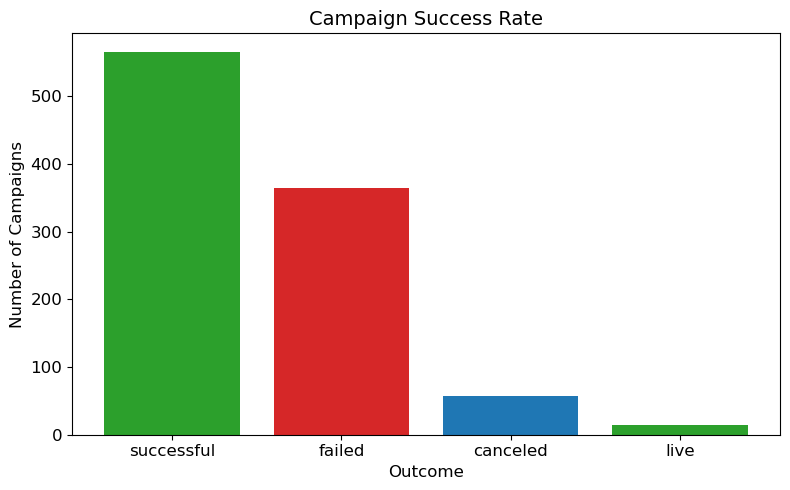

In [72]:
campaign_outcome_count = campaign_df['outcome'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(campaign_outcome_count.index, campaign_outcome_count.values, color=['#2ca02c', '#d62728', '#1f77b4'])
plt.title('Campaign Success Rate', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Campaigns', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()



### **Analysis of Campaign Success Rate Bar Chart:**

- **Successful Campaigns**: This bar shows how many campaigns reached their funding goals.
- **Failed Campaigns**: This bar highlights the number of campaigns that didn’t meet their goals.

### Key Takeaway:
- A taller **successful** bar means most campaigns met their targets, while a taller **failed** bar indicates that more campaigns struggled to succeed.

This chart gives a quick comparison of campaign outcomes.


### Pledged Percentage per Campaign

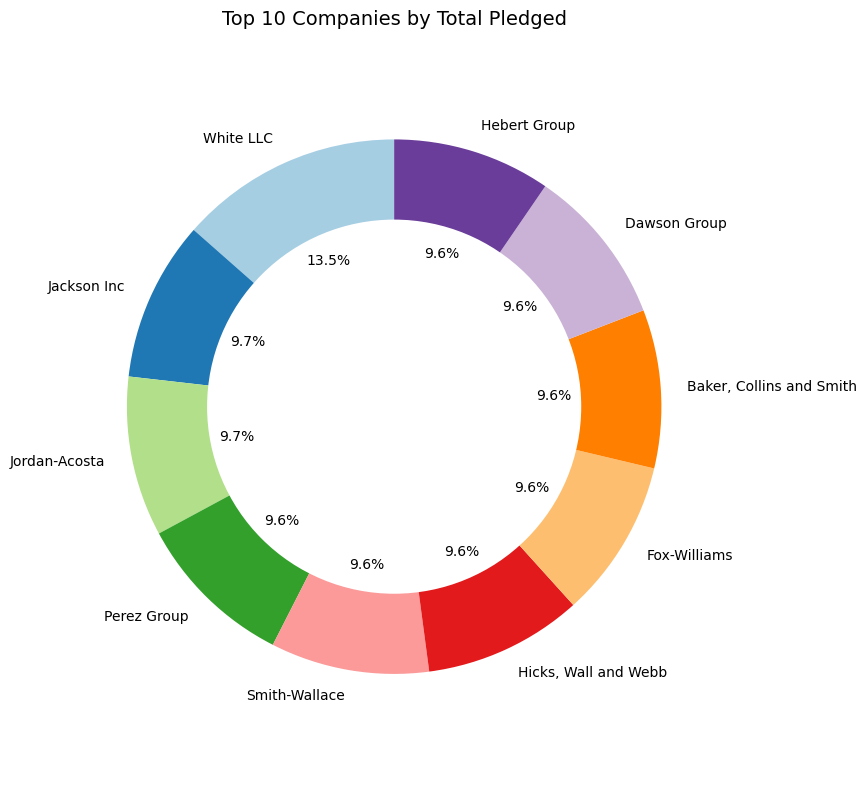

In [23]:
# Group by company_name and calculate total pledged per company
top_pledged_companies = campaign_df.groupby('company_name')['pledged'].sum().sort_values(ascending=False).head(10)

# Create a pie chart for the top 10 companies by pledged amount
plt.figure(figsize=(8, 8))
plt.pie(top_pledged_companies, labels=top_pledged_companies.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 10 Companies by Total Pledged', fontsize=14)

# Draw the pie chart as a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.axis('equal')

# Show the plot
plt.show()

### **Analysis of Top 10 Companies by Total Pledged (Donut Chart):**

The chart shows the top 10 companies that raised the most funds:

- **Key Contributors**: Larger slices represent companies that attracted the highest pledges, showing their success in crowdfunding.
- **Distribution**: The proportion of slices indicates how the total pledged amounts are spread across the top companies.

### Key Takeaway:
A few companies dominate crowdfunding success, while others contribute but to a lesser extent.


### Extract the contacts.xlsx Data.

In [24]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=2)
contact_info_df.head()

,
0,contact_info
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [25]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json
dict_values = []
# Iterate through each row in the DataFrame
for i, row in contact_info_df.iterrows():
    try:
        # Access the first column by position and convert JSON string into a dictionary
        data = json.loads(row.iloc[0])
        
        # Extract the values from the dictionary
        row_values = list(data.values())
        
        # Append the values to the list
        dict_values.append(row_values)
    except json.JSONDecodeError:
        # Skip rows with invalid JSON silently
        pass


# Print out the list of values for each row.
print(dict_values)

[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com'], [5650, 'Socorro Luna', 'socorro.luna@hotmail.com'], [5889, 'Carolina Murray', 'carolina.murray@knight.com'], [4842, 'Kayla Moon', 'kayla.moon@yahoo.de'], [3280, 'Ariadna Geisel', 'ariadna.geisel@rangel.com'], [5468, 'Danielle Ladeck', 'danielle.ladeck@scalfaro.net'], [3064, 'Tatiana Thompson', 'tatiana.thompson@hunt.net'], [4904, 'Caleb Benavides', 'caleb.benavides@rubio.com'], [1299, 'Sandra Hardy', 'sandra.hardy@web.de'], [5602, 'Lotti Morris', 'lotti.morris@yahoo.co.uk'], [5753, 'Reinhilde White', 'reinhilde.white@voila.fr'], [4495, 'Kerry Patel', 'kerry.patel@hutchinson.com'], [4269, 'Sophie Antoine', 'sophie.antoine@andersen.com'], [2226, 'Martha Girard', 'martha.girard@web.de'], [1558, 'Stephanie King', 'step

In [26]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.

contacts_df_clean = pd.DataFrame(dict_values, columns=['contact_id', 'name', 'email'])

# Display the DataFrame
contacts_df_clean.head()


,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [27]:
# Check the datatypes.
contacts_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   name        1000 non-null   object
 2   email       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [28]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 

# Ensure the 'name' column is of string type
contacts_df_clean['name'] = contacts_df_clean['name'].astype(str)

# Split the 'name' column into 'first_name' and 'last_name'
contacts_df_clean[['first_name', 'last_name']] = contacts_df_clean['name'].str.split(' ', n=1, expand=True)

# Drop the contact_name column
contacts_df_clean = contacts_df_clean.drop('name', axis=1)

# Display the updated DataFrame
contacts_df_clean.head()



,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [29]:
# Reorder the columns

contacts_df_clean = contacts_df_clean[['contact_id', 'first_name', 'last_name', 'email']]

# Display the updated DataFrame to verify the order
contacts_df_clean.head()


,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [30]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [31]:
# Export the DataFrame as a CSV file. 
contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [32]:
# Step 1: Remove the first row
contact_info_df = contact_info_df.iloc[1:].reset_index(drop=True)

# Step 2: Rename the first column to 'contact_info'
contact_info_df.columns = ['contact_info']

# Display the updated DataFrame to verify
print(contact_info_df.head())

                                                                                contact_info
0   {"contact_id": 4661, "name": "Cecilia Velasco", "email": "cecilia.velasco@rodrigues.fr"}
1          {"contact_id": 3765, "name": "Mariana Ellis", "email": "mariana.ellis@rossi.org"}
2            {"contact_id": 4187, "name": "Sofie Woods", "email": "sofie.woods@riviere.com"}
3  {"contact_id": 4941, "name": "Jeanette Iannotti", "email": "jeanette.iannotti@yahoo.com"}
4        {"contact_id": 2199, "name": "Samuel Sorgatz", "email": "samuel.sorgatz@gmail.com"}


In [33]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [34]:
# Extract the four-digit contact ID number.
contact_info_df_copy['contact_id'] = contact_info_df_copy['contact_info'].str.extract(r'contact_id": (\d{4})')
contact_info_df_copy

,contact_info,contact_id
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199
...,...,...
995,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684
996,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784
997,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498
998,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073


In [35]:
# Check the datatypes.
contact_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   contact_info  1000 non-null   object
 1   contact_id    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [36]:
# Convert the "contact_id" column to an int64 data type.
contact_info_df_copy['contact_id']=contact_info_df_copy['contact_id'].astype(int)
contact_info_df_copy['contact_id'].dtype

dtype('int64')

In [37]:
# Extract the name of the contact and add it to a new column.
contact_info_df_copy['name'] = contact_info_df_copy['contact_info'].str.extract(r'"name": "([^"]*)"')
contact_info_df_copy

,contact_info,contact_id,name
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz
...,...,...,...
995,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684,Whitney Noack
996,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784,Gelsomina Migliaccio
997,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498,Evangelista Pereira
998,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073,Gareth Comolli


In [38]:
# Extract the email from the contacts and add the values to a new column.
contact_info_df_copy['email'] = contact_info_df_copy['contact_info'].str.extract(r'"email": "([^"]*)"')
contact_info_df_copy

,contact_info,contact_id,name,email
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis,mariana.ellis@rossi.org
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods,sofie.woods@riviere.com
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...,...
995,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}",3684,Whitney Noack,whitney.noack@laboratorios.org
996,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}",5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
997,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}",1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
998,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}",6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [39]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
contact_info=contact_info_df_copy.copy()
contact_info=contact_info[['contact_id', 'name' , 'email']]
contact_info

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...
995,3684,Whitney Noack,whitney.noack@laboratorios.org
996,5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
997,1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
998,6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [40]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 

contact_info[['first_name', 'last_name']] = contact_info['name'].str.split(' ', expand=True)

# Drop the contact_name column
del contact_info['name']


In [41]:
# Reorder the columns
contact_info=contact_info[['contact_id', 'first_name', 'last_name' , 'email']]

In [42]:
# Check the datatypes one more time before exporting as CSV file.
contact_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [43]:
# Export the DataFrame as a CSV file. 
# contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)
contact_info.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Top 5 Countries by Campaign Success Rate

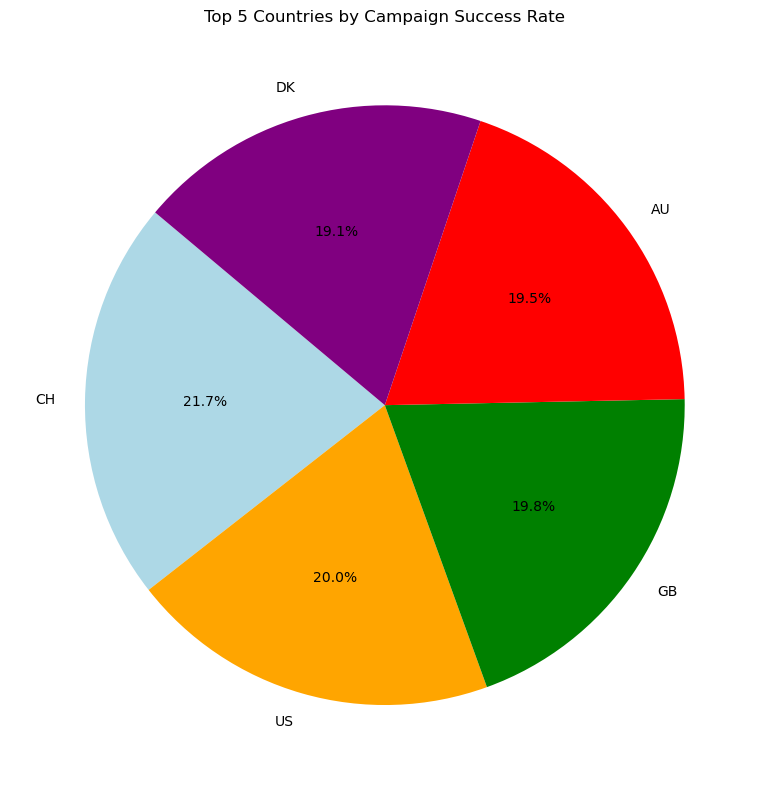

In [50]:
# Re-load the campaign data and compute success rates by country
import pandas as pd
import matplotlib.pyplot as plt

# Reload the campaign data
campaign_csv = pd.read_csv('Resources/campaign.csv')

# Create a pivot table with outcomes per country
country_outcome_counts = campaign_csv.pivot_table(index='country', columns='outcome', aggfunc='size', fill_value=0)

# Add a new column to calculate the success rate (successful / (successful + failed))
country_outcome_counts['success_rate'] = country_outcome_counts['successful'] / (country_outcome_counts['successful'] + country_outcome_counts['failed'])

# Sort the data by success rate
sorted_country_success = country_outcome_counts[['success_rate']].sort_values(by='success_rate', ascending=False)

# Plotting the success rates by country for the top 5 countries as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sorted_country_success['success_rate'][:5], 
        labels=sorted_country_success.index[:5], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['lightblue', 'orange', 'green', 'red', 'purple'])

plt.title('Top 5 Countries by Campaign Success Rate')
plt.tight_layout()

# Show the plot
plt.show()


### **Analysis of Crowdfunding Success Rates by Country:**

The pie chart shows the top 5 countries with the highest crowdfunding success rates:

- **Switzerland (CH)** leads with a **66.67%** success rate, indicating strong campaign engagement.
- **United States (US)** follows at **61.41%**, reflecting a well-established crowdfunding ecosystem.
- **United Kingdom (GB)** and **Australia (AU)** both have success rates around **60%**, showing consistent campaign performance.
- **Denmark (DK)** has a **58.62%** success rate.

Overall, smaller countries like Switzerland demonstrate high success rates, suggesting effective campaigns and engaged backers.


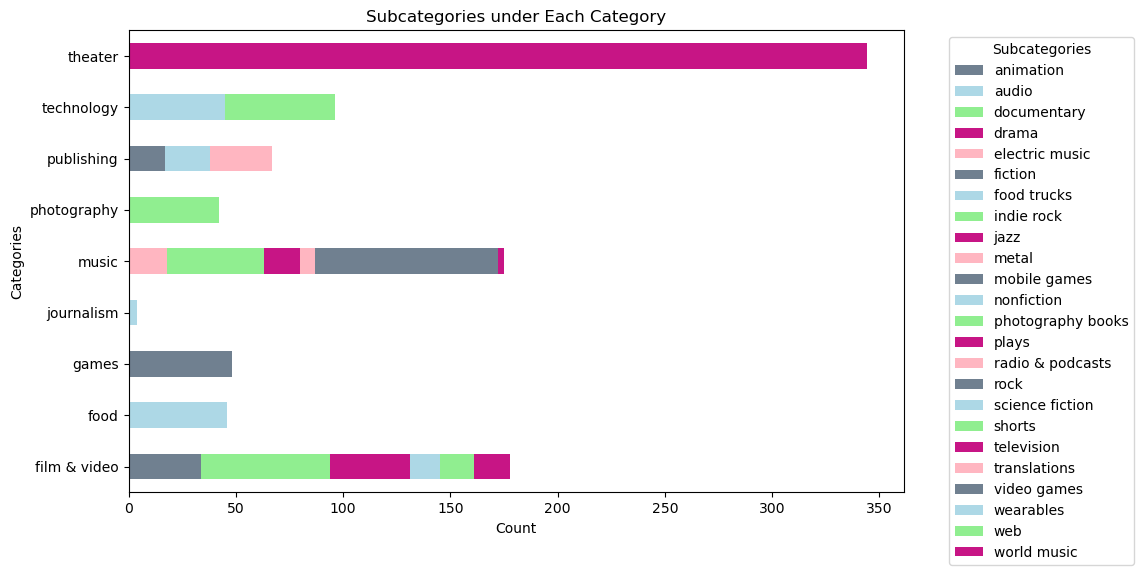

In [78]:

grouped_df = crowdfunding_info_df.groupby(['category', 'subcategory']).size().unstack(fill_value=0)
grouped_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=['slategray', 'lightblue', 'lightgreen', 'mediumvioletred', 'lightpink'])
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Subcategories under Each Category')
plt.legend(title='Subcategories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()